<a href="https://colab.research.google.com/github/A01795046/Python-Feature-Engineering-Cookbook/blob/master/Actividad6FE_Equipo36.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 6**
Ingeniería de características (FE)

---

*   EQUIPO 36
    - Andrea Sánchez Martínez A01795414
    - Juan Carlos Garza Sánchez
    - Miguel Angel Mayori Vera A01795046
    - Sergio Pulido Morales A01794935

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 6/Actividad6_FE"
os.chdir(DIR)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [6]:
cars_df = pd.read_csv('vehicles.csv')
cars_df.head(20)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
5,7222379453,https://hudsonvalley.craigslist.org/cto/d/west...,hudson valley,https://hudsonvalley.craigslist.org,1600,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
6,7221952215,https://hudsonvalley.craigslist.org/cto/d/west...,hudson valley,https://hudsonvalley.craigslist.org,1000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
7,7220195662,https://hudsonvalley.craigslist.org/cto/d/poug...,hudson valley,https://hudsonvalley.craigslist.org,15995,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
8,7209064557,https://medford.craigslist.org/cto/d/grants-pa...,medford-ashland,https://medford.craigslist.org,5000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,or,NaN,NaN,NaN
9,7219485069,https://erie.craigslist.org/cto/d/erie-2012-su...,erie,https://erie.craigslist.org,3000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,pa,NaN,NaN,NaN


In [10]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

# **Parte 1**. Preprocesamiento

1a)    Elimina las columnas que no serán relevantes para esta actividad: `id`, `VIN`, `url`, `image_url`, `description`, `posting_date`.


In [11]:
new_cars_df = cars_df.drop(columns=['id', 'VIN', 'url', 'image_url', 'description', 'posting_date'])
new_cars_df

,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,county,state,lat,long
0,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN
1,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN
2,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN
3,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN
4,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,NaN,sedan,NaN,NaN,wy,33.786500,-84.445400
426876,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,fwd,NaN,sedan,red,NaN,wy,33.786500,-84.445400
426877,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,NaN,NaN,hatchback,white,NaN,wy,33.779214,-84.411811
426878,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,NaN,sedan,silver,NaN,wy,33.786500,-84.445400


1b) Almacena en una variable la cantidad de observaciones o registros del dataframe y en otra el número de columnas (después del borrado) para análisis posteriores.

In [14]:
num_rows = new_cars_df.shape[0]
num_col = new_cars_df.shape[1]
print('El número de filas de dataframe es {} y de columnas es {}.'.format(num_rows,num_col))

El número de filas de dataframe es 426880 y de columnas es 20.


## Valores faltantes

Cuando la cantidad de valores faltantes en una columna es lo suficientemente grande (aproximadamente más del 25%), estimar e ingresar los valores faltantes no tiene sentido, y eliminar el atributo es mejor que estimar los valores faltantes. https://learning.oreilly.com/library/view/hands-on-data-preprocessing/9781801072137/B17397_11_Final_NM_ePub.xhtml#_idParaDest-188

Sin embargo, esto no es una regla aplicable a todos los escenarios y hay muchas discusiones en torno a ello. https://discuss.analyticsvidhya.com/t/what-should-be-the-allowed-percentage-of-missing-values/2456/10

Para esta actividad  utilizaremos un umbral de 0.70 de la cantidad de registros (aquellas columnas que tengan 70% de valores no nulos). Considera además que estamos asumiendo que dichas variables son MCAR o MAR sin ninguna método gráfico o estadístico.

2a) Determina el porcentaje de valores faltantes por columna y elimina aquellas que posean el 30% o más de valores perdidos. Para ello utiliza el parámetro `thresh` de la función `dropna()` ¿Cuántas columnas se eliminaron?


In [ ]:
print('\n* Porcentaje de valores faltantes por columna (%):\n{}'.format((new_cars_df.isnull().sum()*100/num_rows)))
print('\n Deberian eliminarse 6 columnas.\n')
new_cars_df = new_cars_df.dropna(thresh=(num_rows*0.7), axis=1)
print(new_cars_df)
print('\n* Finalmente se eliminaron {} columnas'.format(num_col - new_cars_df.shape[1]))


* Porcentaje de valores faltantes por columna (%):
region            0.000000
region_url        0.000000
price             0.000000
year              0.282281
manufacturer      4.133714
model             1.236179
condition        40.785232
cylinders        41.622470
fuel              0.705819
odometer          1.030735
title_status      1.930753
transmission      0.598763
drive            30.586347
size             71.767476
type             21.752717
paint_color      30.501078
county          100.000000
state             0.000000
lat               1.534155
long              1.534155
dtype: float64

 Deberian eliminarse 6 columnas.

                        region                         region_url  price  \
0                     prescott    https://prescott.craigslist.org   6000   
1                 fayetteville       https://fayar.craigslist.org  11900   
2                 florida keys        https://keys.craigslist.org  21000   
3       worcester / central MA   https://worcester.cra

Porcentaje de valores faltantes por columna

In [22]:
#miguel
col_del = []
col_5p = []
print('Missing Values')
for col in new_cars_df.columns:
  n_MV = sum(new_cars_df[col].isna())
  p_MV= (n_MV/num_rows) * 100
  if (p_MV >= 30 ):
    col_del.append(col)
    print('X {} - {} : {:,.2f} %'.format(col, n_MV, p_MV))
  elif (p_MV <= 5) :
    col_5p.append(col)
    print('* {} - {} : {:,.2f} %'.format(col, n_MV, p_MV))
  else :
    print('  {} : {:,.2f} %'.format(col, p_MV))

print('Columnas con el 30% o mas', col_del)
# aplica para la siguiente pregunta 2b
print('Columnas con al menos 5%', col_5p)

Missing Values
* region - 0 : 0.00 %
* region_url - 0 : 0.00 %
* price - 0 : 0.00 %
* year - 1205 : 0.28 %
* manufacturer - 17646 : 4.13 %
* model - 5277 : 1.24 %
X condition - 174104 : 40.79 %
X cylinders - 177678 : 41.62 %
* fuel - 3013 : 0.71 %
* odometer - 4400 : 1.03 %
* title_status - 8242 : 1.93 %
* transmission - 2556 : 0.60 %
X drive - 130567 : 30.59 %
X size - 306361 : 71.77 %
  type : 21.75 %
X paint_color - 130203 : 30.50 %
X county - 426880 : 100.00 %
* state - 0 : 0.00 %
* lat - 6549 : 1.53 %
* long - 6549 : 1.53 %
Columnas con el 30% o mas ['condition', 'cylinders', 'drive', 'size', 'paint_color', 'county']
Columnas con al menos 5% ['region', 'region_url', 'price', 'year', 'manufacturer', 'model', 'fuel', 'odometer', 'title_status', 'transmission', 'state', 'lat', 'long']


Elimina aquellas que posean el 30% o más de valores perdidos

In [24]:
#miguel
clean_df = new_cars_df.dropna(thresh=0.7*len(new_cars_df), axis=1)
clean_df.info()
print('Se eliminan las siguientes cols',col_del)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   region_url    426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   fuel          423867 non-null  object 
 7   odometer      422480 non-null  float64
 8   title_status  418638 non-null  object 
 9   transmission  424324 non-null  object 
 10  type          334022 non-null  object 
 11  state         426880 non-null  object 
 12  lat           420331 non-null  float64
 13  long          420331 non-null  float64
dtypes: float64(4), int64(1), object(9)
memory usage: 45.6+ MB
Se eliminan las siguientes cols ['condition', 'cylinders', 'drive', 'size', 'paint_color', 'county']


Además, cuando tenemos grandes conjuntos de datos, podemos eliminar filas que contienen valores nulos. Aunque, no se recomienda si el porcentaje de valores faltantes en el conjunto de datos es superior al 30%
https://medium.com/analytics-vidhya/how-to-deal-with-missing-values-in-data-set-8e8f70ecf155

2b) Borra los registros que contengan `NaN` en las columnas con menos del 5% de valores faltantes empleando el parámetro subset ¿Qué porcentaje de los registros iniciales se eliminaron?


In [ ]:
mean_col_df = new_cars_df.isnull().sum()*100/num_rows
cols = mean_col_df[mean_col_df < 5].index
new_cars_df = new_cars_df.dropna(subset=cols)
print(new_cars_df)
print('\n* El porcentaje de registros eliminados fue: {}%'.format((num_rows - new_cars_df.shape[0])*100/num_rows))

         region                      region_url  price    year manufacturer  \
27       auburn   https://auburn.craigslist.org  33590  2014.0          gmc   
28       auburn   https://auburn.craigslist.org  22590  2010.0    chevrolet   
29       auburn   https://auburn.craigslist.org  39590  2020.0    chevrolet   
30       auburn   https://auburn.craigslist.org  30990  2017.0       toyota   
31       auburn   https://auburn.craigslist.org  15000  2013.0         ford   
...         ...                             ...    ...     ...          ...   
426875  wyoming  https://wyoming.craigslist.org  23590  2019.0       nissan   
426876  wyoming  https://wyoming.craigslist.org  30590  2020.0        volvo   
426877  wyoming  https://wyoming.craigslist.org  34990  2020.0     cadillac   
426878  wyoming  https://wyoming.craigslist.org  28990  2018.0        lexus   
426879  wyoming  https://wyoming.craigslist.org  30590  2019.0          bmw   

                           model    fuel  odometer 

Borra los registros que contengan NaN en las columnas con menos del 5% de valores faltantes empleando el parámetro subset

In [27]:
#miguel
clean_df2b = clean_df.dropna( subset=col_5p)
print('Se eliminaron el {:,.2f} %'.format(clean_df2b.shape[0] * 100 / num_rows ))

Se eliminaron el 89.84 %


2c) Si hay variables que aún poseen valores faltantes, utiliza el método de imputación apropiado (`mean, median, mode`)

In [ ]:
print('\n* Porcentaje de valores faltantes por columna (%):\n{}'.format((new_cars_df.isnull().sum()*100/new_cars_df.shape[0])))
print('\n La variable que aún tiene valores faltantes es type, esta variable es cuantitativa nominal por lo que el método de imputación más apropiado es la moda.')
print('\n Moda para la variable type: {}'.format(new_cars_df.type.mode()[0]))
new_cars_df.type = new_cars_df.type.fillna(new_cars_df.type.mode()[0])
print("\n* Nueva cantidad de valores faltantes para type: {}".format((new_cars_df.type.isnull().sum())))


* Porcentaje de valores faltantes por columna (%):
region           0.000000
region_url       0.000000
price            0.000000
year             0.000000
manufacturer     0.000000
model            0.000000
fuel             0.000000
odometer         0.000000
title_status     0.000000
transmission     0.000000
type            21.485623
state            0.000000
lat              0.000000
long             0.000000
dtype: float64

 La variable que aún tiene valores faltantes es type, esta variable es cuantitativa nominal por lo que el método de imputación más apropiado es la moda.

 Moda para la variable type: sedan

* Nueva cantidad de valores faltantes para type: 0


variables que aún poseen valores faltantes


In [29]:
clean_df2b.isna()
print('Missing Values')
col_MV = []
for col in clean_df2b.columns:
  n_MV = sum(clean_df2b[col].isna())
  if (n_MV > 0) :
    col_MV.append(col)
    print('  {} : {}'.format(col, n_MV))
print('Variables que aun poseen valores faltantes', col_MV)

Missing Values
  type : 82395
Variables que aun poseen valores faltantes ['type']


Para imputar correctamente los valores faltantes, debemos analizar el data y ver si cualquier medida de valor es aplicable

In [38]:
clean_df2b.head(40)

,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,type,state,lat,long
27,auburn,https://auburn.craigslist.org,33590,2014.0,gmc,sierra 1500 crew cab slt,gas,57923.0,clean,other,pickup,al,32.590000,-85.480000
28,auburn,https://auburn.craigslist.org,22590,2010.0,chevrolet,silverado 1500,gas,71229.0,clean,other,pickup,al,32.590000,-85.480000
29,auburn,https://auburn.craigslist.org,39590,2020.0,chevrolet,silverado 1500 crew,gas,19160.0,clean,other,pickup,al,32.590000,-85.480000
30,auburn,https://auburn.craigslist.org,30990,2017.0,toyota,tundra double cab sr,gas,41124.0,clean,other,pickup,al,32.590000,-85.480000
31,auburn,https://auburn.craigslist.org,15000,2013.0,ford,f-150 xlt,gas,128000.0,clean,automatic,truck,al,32.592000,-85.518900
32,auburn,https://auburn.craigslist.org,27990,2012.0,gmc,sierra 2500 hd extended cab,gas,68696.0,clean,other,pickup,al,32.590000,-85.480000
33,auburn,https://auburn.craigslist.org,34590,2016.0,chevrolet,silverado 1500 double,gas,29499.0,clean,other,pickup,al,32.590000,-85.480000
34,auburn,https://auburn.craigslist.org,35000,2019.0,toyota,tacoma,gas,43000.0,clean,automatic,truck,al,32.601300,-85.443974
35,auburn,https://auburn.craigslist.org,29990,2016.0,chevrolet,colorado extended cab,gas,17302.0,clean,other,pickup,al,32.590000,-85.480000
36,auburn,https://auburn.craigslist.org,38590,2011.0,chevrolet,corvette grand sport,gas,30237.0,clean,other,other,al,32.590000,-85.480000


In [45]:
#miguel
clean_df2b['type'].value_counts()
# con estos valores no podemos imputar ninguna medida central a esta variable categorica
# ejemplo: tomando la moda : sendan, al registro jeep	cherokee	gas	192000.0	clean	automatic	NaN	, si imputo sedan a este jeep no tiene sentido

sedan          79618
SUV            69891
pickup         40414
truck          31301
other          18549
coupe          16964
hatchback      14949
wagon          10011
van             7224
convertible     6820
mini-van        4530
offroad          549
bus              274
Name: type, dtype: int64

Dado que no se puede aplicar una tendencia central a la variable categorica asignamos aquellos valores faltantes a otra categoria

In [50]:
#miguel
clean_df2b['type'].fillna('unknown', inplace=True)
clean_df2b['type'].value_counts()

<ipython-input-50-689a752d255f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df2b['type'].fillna('unknown', inplace=True)


unknown        82395
sedan          79618
SUV            69891
pickup         40414
truck          31301
other          18549
coupe          16964
hatchback      14949
wagon          10011
van             7224
convertible     6820
mini-van        4530
offroad          549
bus              274
Name: type, dtype: int64

## Valores atípicos

3a) Obtén el histograma de las variables `price`, `year` y `odometer` para observar su distribución.

NameError: ignored

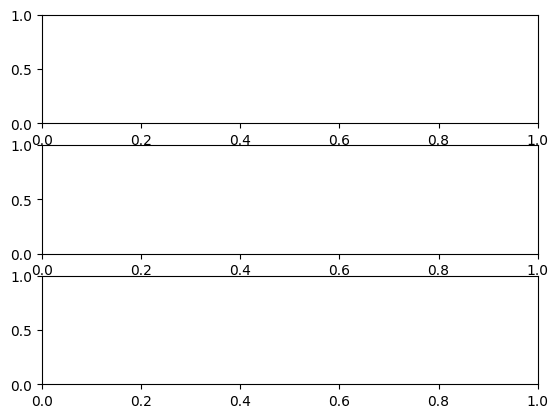

In [10]:
fig, axs = plt.subplots(3)
sns.histplot(data=new_cars_df, x="price", kde='true', ax=axs[0])
sns.histplot(data=new_cars_df, x="year", kde='true', ax=axs[1])
sns.histplot(data=new_cars_df, x="odometer", kde='true', ax=axs[2])

In [1]:
# miguel
# tomamos los datos originales
g = sns.histplot(data=cars_df, x = 'price')
g.set_xlabel('Price')

NameError: ignored

3b) Añade la columna `age`, calculada a partir de `year`, para determinar los años del vehículo y una vez obtenida, elimina la columna `year`. Genera el histograma de la nueva variable.

         region                      region_url  price    year manufacturer  \
27       auburn   https://auburn.craigslist.org  33590  2014.0          gmc   
28       auburn   https://auburn.craigslist.org  22590  2010.0    chevrolet   
29       auburn   https://auburn.craigslist.org  39590  2020.0    chevrolet   
30       auburn   https://auburn.craigslist.org  30990  2017.0       toyota   
31       auburn   https://auburn.craigslist.org  15000  2013.0         ford   
...         ...                             ...    ...     ...          ...   
426875  wyoming  https://wyoming.craigslist.org  23590  2019.0       nissan   
426876  wyoming  https://wyoming.craigslist.org  30590  2020.0        volvo   
426877  wyoming  https://wyoming.craigslist.org  34990  2020.0     cadillac   
426878  wyoming  https://wyoming.craigslist.org  28990  2018.0        lexus   
426879  wyoming  https://wyoming.craigslist.org  30590  2019.0          bmw   

                           model    fuel  odometer 

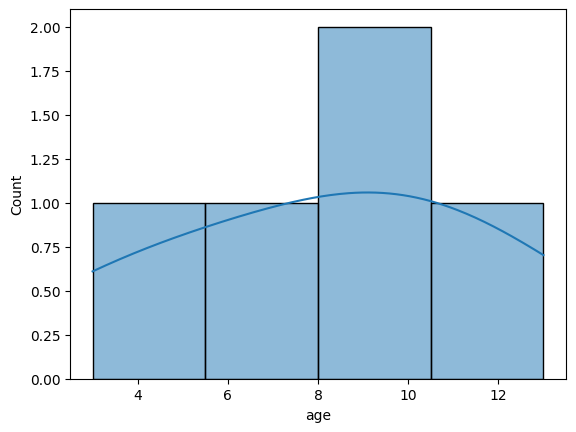

In [ ]:
new_cars_df["age"] = new_cars_df.apply(lambda x: (2023 - x['year']), axis=1)
print(new_cars_df)
new_cars_df = new_cars_df.drop(['year'], axis=1)
print(sns.histplot(data=new_cars_df.head(), x="age", kde='true'))

4a) Para visualizar si hay valores atípicos, genera gráficos de box plot para las tres variables (`price, age, odometer`)

Si el conjunto de outliers es “relativamente grande” (aunque sabemos que deben andar alrededor de un 5% del conjunto total de datos), realizar una investigación particular sobre ellos que permita tomar mejores decisiones.

4b) Calcula, para cada variable, el porcentaje de sus valores atípicos y elimínalos del dataframe ¿Qué porcentaje de los registros iniciales se eliminaron?

4c) Dibuja nuevamente los histogramas para observar claramente el sesgo de las variables tras la eliminación de los outliers.

# **Parte 2**. Ingeniería de características

## Transformando variables numéricas

La distribución de las variables determinará que método usar y en qué orden. Por ejemplo, en variables sesgadas se debe realizar primero la transformación  y luego el escalamiento, ya que el efecto deseado es "desinclinar" las distribuciones del eje y ese efecto se maximiza cuando aplica en el rango completo en comparación con aplicarlo en variables con una desviación estándar unitaria (por z-score) o variables en el rango [0,1] (por Min-Max).

Aplicar es escalamiento antes comprimiría la mayoría de los datos en un rango estrecho. Entonces se debe iniciar con transformar la característica en Gaussiana y luego escalarla.

5a) Genera gráficos Q-Q de las variables `price, age, odometer` para observar las diferencias entre sus distribuciones y la normal.


Las transformaciones *Box-Cox* y *Yeo-Johnson* son generalizaciones, pues incluyen casos especiales de transformaciones: logarítmica (`λ = 0`), recíproca (`λ = -1`),  raíz cuadrada (`λ = 0.5`) y más exponentes. En *Box-Cox* se evalúan varios valores de `λ` y se selecciona aquel que arroja la mejor transformación

La transformación de *Yeo-Johnson* es una extensión de la transformación de *Box-Cox* que ya no está restringida a valores positivos. En otras palabras, la transformación de *Yeo-Johnson* se puede utilizar en variables con valores cero y negativos, así como valores positivos. Cuando la variable solo tiene valores positivos, la transformación de *Yeo-Johnson* es como la transformación de *Box-Cox* de la variable más uno.

En este caso, como las variables `price` y `odometer` tienen valores de 0, utilizaremos *Yeo-Johnson*.

5b) Aplica la transformación Yeo-Johnson para reducir el sesgo en estas variables. Házlo en una copia del dataframe a la que denominarás `transf_df`.

5c) Dibuja nuevamente los gráficos Q-Q y los histogramas para observar el efecto de la transformación.

## Escalando variables numéricas

6a) Como las tres variables poseen diferentes escalas, aplica el método Min-Max (al dataframe obtenido: `transf_df`) para que queden en el rango fijo [0 a 1]. Házlo en una copia del dataframe a la que denominarás `minmax_df`.


6b) Dibuja nuevamente los histogramas para verificar que el escalamiento no cambia la distribución.

## Codificando variables categóricas


7a) Utiliza el método `describe()` para obtener el resumen de las estadísticas descriptivas en las variables categóricas.

7b) Según la cardinalidad observada, separa en dos listas (`highly_cardinal_variables` y `few_cardinal_variables`) los nombres de las variables con alta cardinalidad y baja cardinalidad respectivamente.

7c) Visualiza en gráficos de barras la frecuencias de las categorías para las variables con baja cardinalidad (en `few_cardinal_variables`)

8. Aplica codificación *one-hot* a las variables en `few_cardinal_variables`.


9. Aplica codificación binaria a las variables en `highly_cardinal_variables`.

10. Concatena los dataframes obtenidos de las codificaciones anteriores al dataframe `minmax_df` (cuyas variables numéricas ya están transformadas) y elimina las columnas categóricas originales. Toma en cuenta que si los índices de los dataframes no coinciden, la concatenación no se realizará correctamente. Utiliza `reset_index(drop=True, inplace=True)` para restablecer los índices.